In [1]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"


In [2]:
table = 'inat_data'
schema = 'observers'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [3]:
df.columns

Index(['user_id', 'id', 'login', 'spam', 'suspended', 'created_at',
       'login_autocomplete', 'login_exact', 'name', 'name_autocomplete',
       'orcid', 'icon', 'observations_count', 'identifications_count',
       'journal_posts_count', 'activity_count', 'species_count',
       'universal_search_rank', 'roles', 'site_id', 'icon_url'],
      dtype='object')

In [4]:
df = df.select_dtypes('number')

In [5]:
df.describe()

,user_id,id,observations_count,identifications_count,species_count,universal_search_rank
count,2.292000e+03,2.292000e+03,2292.000000,2292.000000,2292.000000,2292.000000
mean,5.495550e+06,5.495550e+06,1299.965532,1372.191099,295.071117,1299.965532
std,2.694111e+06,2.694111e+06,9989.203583,15062.861901,882.464420,9989.203583
min,5.610000e+02,5.610000e+02,2.000000,0.000000,0.000000,2.000000
25%,3.361698e+06,3.361698e+06,16.000000,0.000000,12.000000,16.000000
50%,5.641148e+06,5.641148e+06,50.000000,0.000000,39.000000,50.000000
75%,7.800036e+06,7.800036e+06,275.500000,9.000000,198.000000,275.500000
max,9.816507e+06,9.816507e+06,334431.000000,604369.000000,15499.000000,334431.000000


In [ ]:
x1= 'observations_count'
x2 ='identifications_count'
x3 = 'species_count'
x4 = 'universal_search_rank'

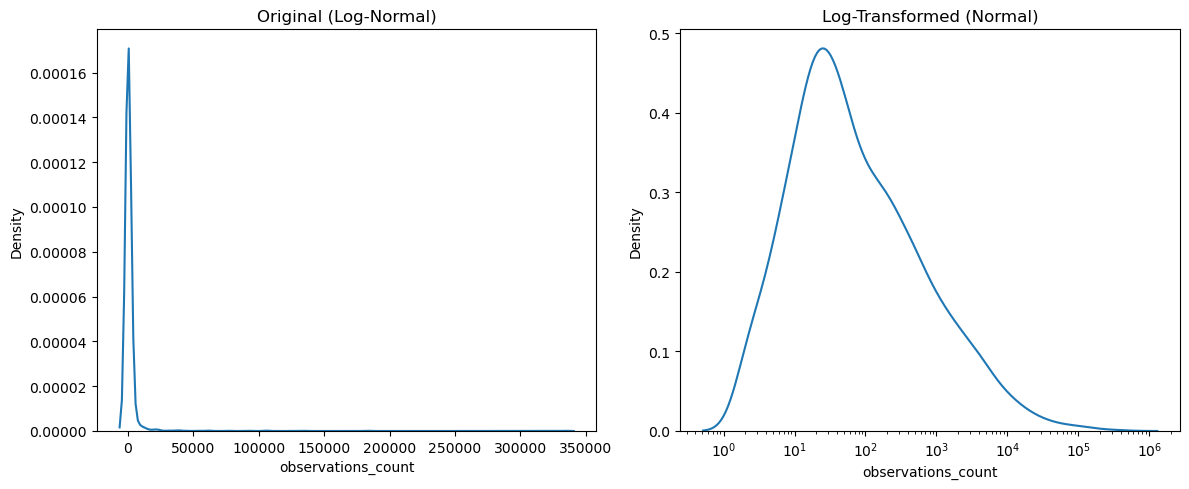

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 5))

sns.kdeplot(df, x = x, log_scale = False, ax=axes[0])
axes[0].set_title("Original (Log-Normal)")
sns.kdeplot(df, x = x, log_scale = True, ax=axes[1])
axes[1].set_title("Log-Transformed (Normal)")

plt.tight_layout()
plt.show()

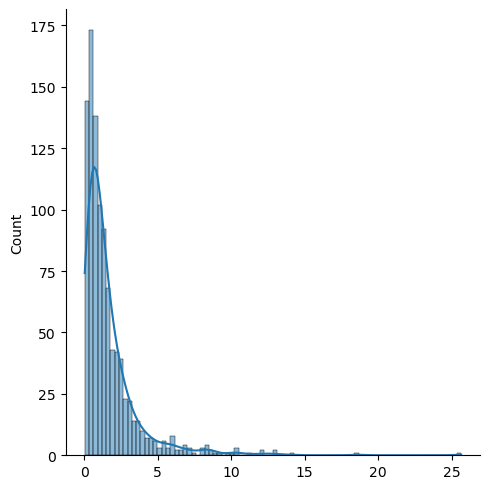

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate log-normal data
data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Plot using displot (histogram + KDE)
sns.displot(data, kde=True)
plt.show()

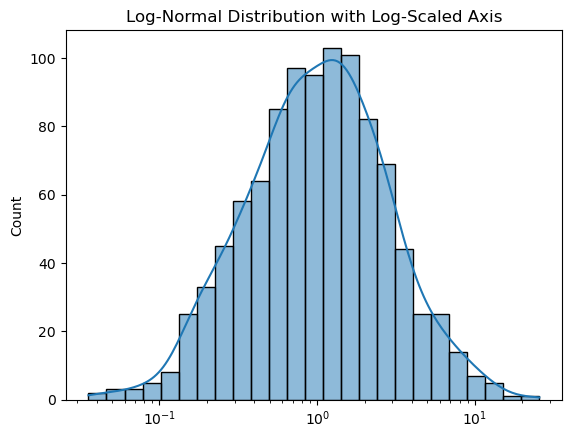

In [8]:
sns.histplot(data=data, log_scale=True, kde=True)
plt.title("Log-Normal Distribution with Log-Scaled Axis")
plt.show()

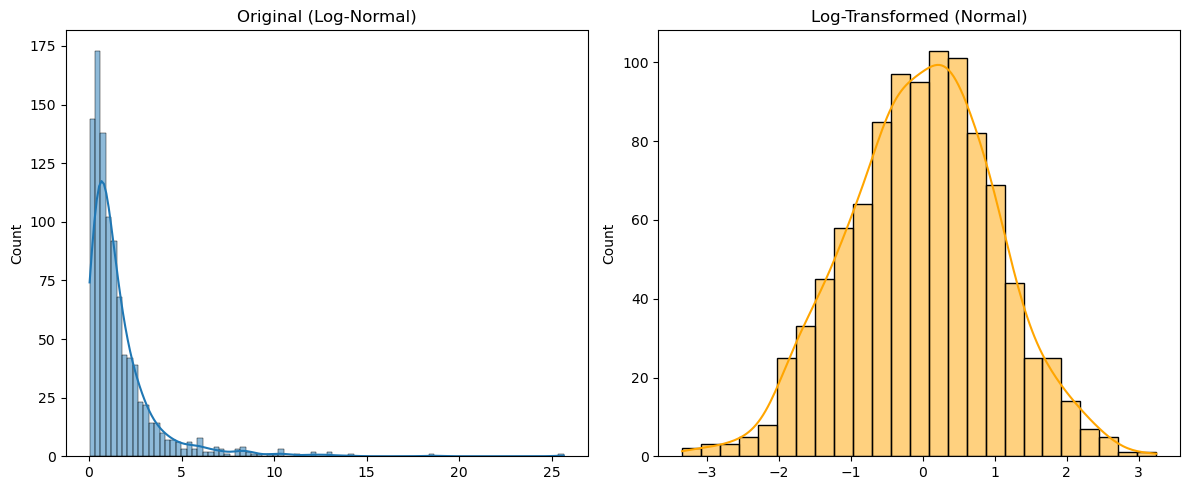

In [ ]:
# Compare log-normal and transformed normal side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original Log-Normal
sns.histplot(data, kde=True, ax=axes[0])
axes[0].set_title("Original (Log-Normal)")

# Log-Transformed (Normal)
sns.histplot(np.log(data), kde=True, ax=axes[1], color="orange")
axes[1].set_title("Log-Transformed (Normal)")



In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto # A common power-law distribution example

# Generate data following a power law (Pareto distribution)
# 'b' is the shape parameter (alpha in power law notation, here alpha = 2)
alpha = 2
data = pareto.rvs(b=alpha, size=1000)
# Often power laws have a minimum value > 0, so let's shift it a bit
data += 1


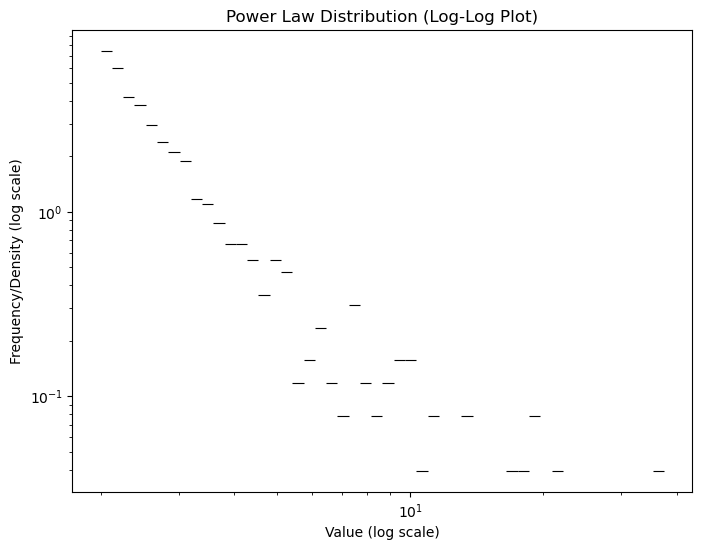

In [11]:
# Create a histogram with logarithmic scales on both x and y axes
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=50, kde=False, stat="density", log_scale=[True, True])

plt.title("Power Law Distribution (Log-Log Plot)")
plt.xlabel("Value (log scale)")
plt.ylabel("Frequency/Density (log scale)")
plt.show()
